# THE SPARKS FOUNDATION INTERNSHIP

# DATA SCIENCE AND BUSINESS ANALYTICS

## TASK 6 : CREATE DECISION TREE CLASSIFIER AND VISUALIZE IT .
## LANGUAGE : PYTHON
## AUTHOR : ADARSH VEER

In [106]:
#importing the libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [107]:
#importing the data
data=pd.read_csv(r'C:\Users\hp\Downloads\Iris.csv')
#cleadata

In [108]:
#cleaning the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [125]:
#knowing our data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [109]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

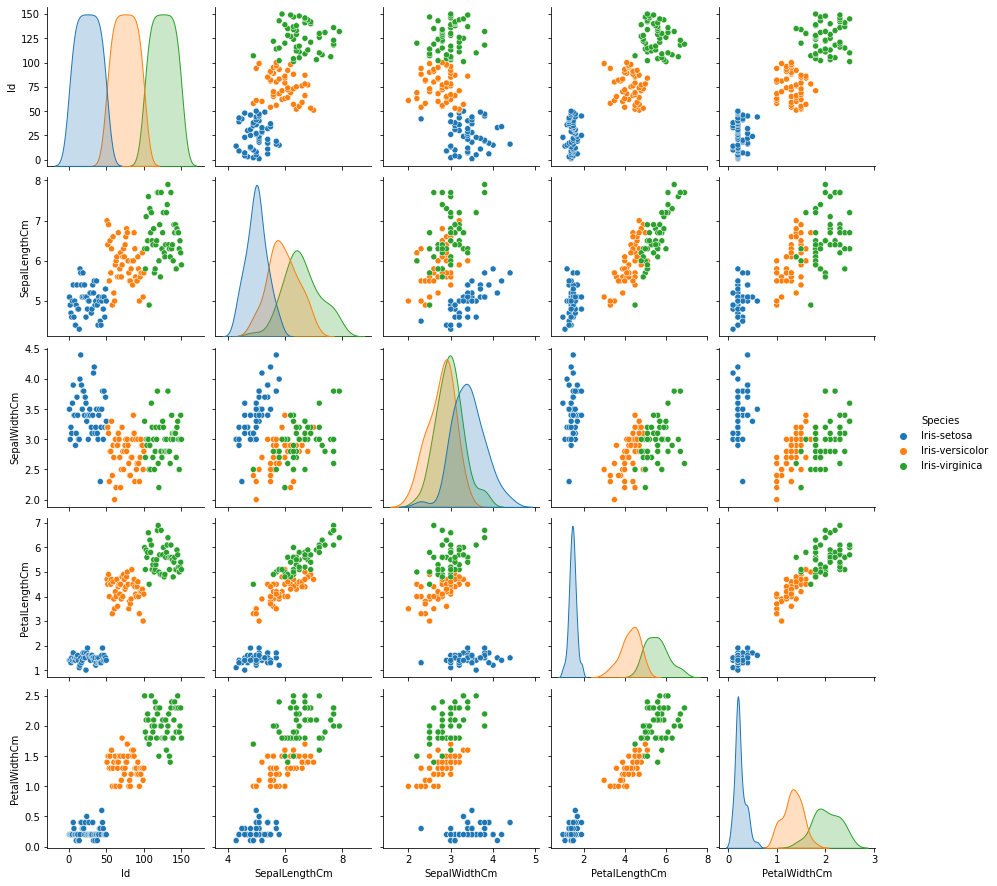

In [110]:
#data visualization
import seaborn as sb
sb.pairplot(data,hue='Species')

In [111]:
#preparing the data
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [112]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [113]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [126]:
#Training your model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [115]:
x_train

array([[6. , 3. , 4.8, 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [6.5, 3. , 5.2, 2. ],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [6.1, 2.8, 4.7, 1.2],
       [6. , 2.2, 4. , 1. ],
       [7.3, 2.9, 6.3, 1.8],
       [7.4, 2.8, 6.1, 1.9],
       [4.6, 3.4, 1.4, 0.3],
       [6.5, 3.2, 5.1, 2. ],
       [6. , 2.7, 5.1, 1.6],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 2.3, 4. , 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [6.2, 2.9, 4.3, 1.3],
       [5.9, 3.2, 4.8, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [4.5, 2.3, 1.3, 0.3],
       [7.7, 3. , 6.1, 2.3],
       [5.2, 2.7, 3.9, 1.4],
       [4.4, 2.9, 1.4, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [6.4, 3

In [116]:
x_test

array([[5.9, 3. , 5.1, 1.8],
       [5.2, 4.1, 1.5, 0.1],
       [6.5, 2.8, 4.6, 1.5],
       [6.8, 3. , 5.5, 2.1],
       [4.9, 3.1, 1.5, 0.1],
       [5.2, 3.5, 1.5, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 2. , 3.5, 1. ],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.2, 5. , 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [5.9, 3. , 4.2, 1.5],
       [5.5, 3.5, 1.3, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.8, 2.8, 4.8, 1.4],
       [7.1, 3. , 5.9, 2.1],
       [6.7, 3. , 5.2, 2.3],
       [6.4, 2.8, 5.6, 2.2],
       [5.5, 2.5, 4. , 1.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.3, 2.7, 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.6, 3. , 6.6, 2.1]])

In [117]:
y_train

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', '

In [118]:
y_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [119]:
#Creating Classifier for the model 

Classifier=DecisionTreeClassifier()
Classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
y_prediction=Classifier.predict(x_test)
y_prediction

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [121]:
#comparing prediction with actual values
compare_prediction= pd.DataFrame({'y_prediction':[i for i in y_prediction],'y_test':[k for k in y_test]})
compare_prediction

,y_prediction,y_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-versicolor,Iris-versicolor
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-setosa,Iris-setosa
6,Iris-virginica,Iris-virginica
7,Iris-versicolor,Iris-versicolor
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


In [122]:
score_check=accuracy_score(y_test,y_prediction)
score_check

0.9333333333333333

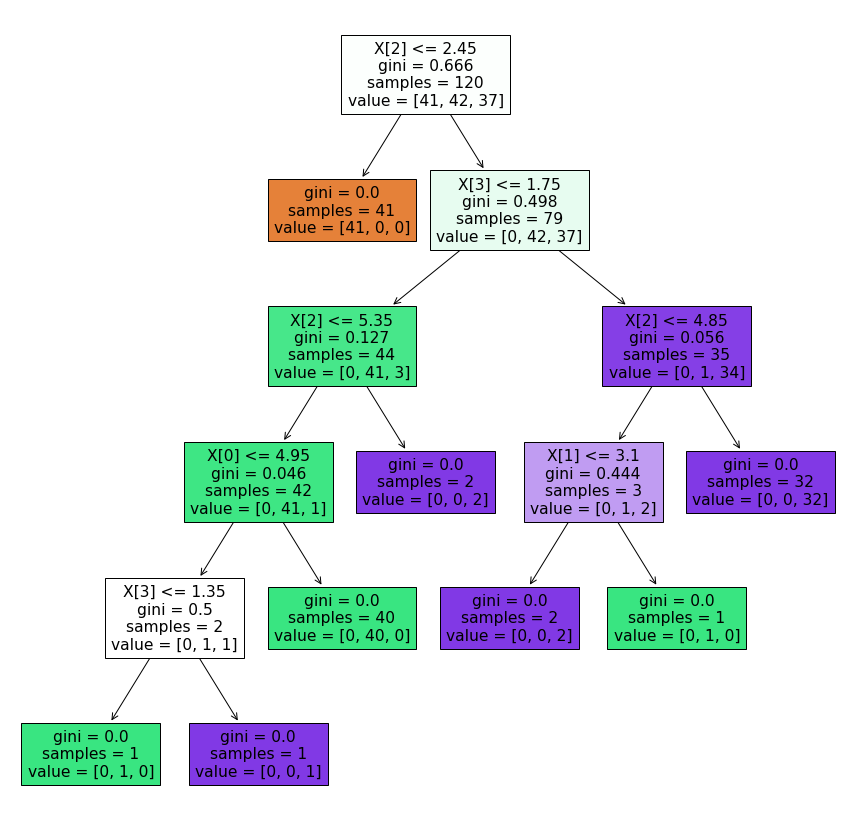

In [123]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(Classifier,filled=True)
plt.show()